## Analysis of the Frequency and Impact of Bird-Aircraft Collisions in The United States

Project by Paola Vizcarra

![Bird-Aircraft Collisions](bird_plane.jpg)
<br>
<div style="text-align: right">Image generated using Microsoft Bing Image Creator (2024)<div></div>

## **<a id='top'>Report Summary</a>**

1. <a href='#1'>Setup</a>
   - Import Libraries
2. <a href='#2'>Dataset Overview</a>
   - Name and Source
   - Purpose
3. <a href='#3'>Structure and Composition</a>
   - Size:
   - Features
4. <a href='#4'>Key Insights from Summary Statistics</a>
   - Numerical Variables
   - Categorical Variables
5. <a href='#5'>Data Quality Assessment</a>
   - Missing Data
   - Balanced Data
   - Duplicates 
   - Outliers
6. <a href='#6'>Patterns and Relationships</a>
   1. FlightPhase, Altitude - Features
   2. Pilots Warned - Feature
   3. Engine - Feature
   4. ConditionsPrecipitation - Feature
   5. MakeModel - Feature
   6. NumberStruckActual - Feature
   7. FlightDate - Feature
   8. OriginState - Feature
   9. Cost - Feature¶
   10. PeopleInjured - Feature
8. <a href='#7'>Limitations and Challenges</a>
   - Data Gaps
   - Constraints
9. <a href='#8'>Applications and Relevance</a>
   - Research Questions
   - Potential Use Cases

## **<a id='1'>1. Setup</a>** 
<div style="text-align: right"><a href="#top">Go to Top</a><div>

### **Import Libraries**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math

import plotly.express as px # For Choropleth Map in Patterns and Relationships: J. OriginState - Feature

%matplotlib inline

## **<a id='2'>2. Dataset Overview</a>**
<div style="text-align: right"><a href="#top">Go to Top</a><div>

### **Name and Source**

This report uses the “Bird Strikes in Aviation: Aircraft Collisions” dataset from Kaggle.com at https://www.kaggle.com/datasets/iamtapendu/bird-strike-by-aircafts-data

In [12]:
data = pd.read_csv("Bird_strikes.csv")

### **Purpose**

In aviation, one notable risk is bird strikes—collisions between aircraft and birds or other wildlife. These incidents have become more worrisome due to urban expansion and rising air traffic. Bird strikes can cause substantial damage to aircraft, particularly jet engines, and have been associated with fatal accidents. This analysis seeks to deepen our understanding of transportation safety by examining these risks.

## **<a id='3'>3. Structure and Composition</a>** 
<div style="text-align: right"><a href="#top">Go to Top</a><div>

### **Size:**

In [17]:
print("Shape of data is :",data.shape)

Shape of data is : (25429, 26)


The shape of the dataset is (25429, 26) meaning it contains 25429 rows and 26 columns. Each row has information about a bird-aircraft collision, totaling 25429 incidents.

### **Features**

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25429 entries, 0 to 25428
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   RecordID                  25429 non-null  int64 
 1   AircraftType              25429 non-null  object
 2   AirportName               25429 non-null  object
 3   AltitudeBin               25429 non-null  object
 4   MakeModel                 25429 non-null  object
 5   NumberStruck              25429 non-null  object
 6   NumberStruckActual        25429 non-null  int64 
 7   Effect                    2078 non-null   object
 8   FlightDate                25429 non-null  object
 9   Damage                    25429 non-null  object
 10  Engines                   25195 non-null  object
 11  Operator                  25429 non-null  object
 12  OriginState               24980 non-null  object
 13  FlightPhase               25429 non-null  object
 14  ConditionsPrecipitatio

### Information about the dataset

1. The output elements are as follows:
   - Column: the name of the column
   - Non-null Count: how many non-null values are found in the column
   - Dtype: the type of value data type of each column ( int64 = int value, object = string value, bool = boolean Y/N)
2. In the "Effect" column, there are 2078 non-null values, meaning there are 23351 null values. Since this accounts for only 8.17% of the occurrences. This feature can be dropped from the model.
3. The  "ConditionsPrecipitation" column has only 2015 non-null values. But, although the 92.08% of values are missing, we might still analyze this feature as it might serve to deduct how weather interplays in bird-aircraft collisions.
4. The column "Engines" has 25195 non-null values, meaning only 0.92% of the values are missing. Options to handle missing data include:
   - Use the "AircraftType" column to search and gather the missing information from another source
   - Drop the rows with missing values 
   - Replace the missing values with the feature's median.
   Later we'll decide which is more appropriate for this analysis.
5. The "OriginState" column contains only 449 null values. However, upon reviewing the data, it was found that values in uppercase represent locations outside the United States. Since the scope of this analysis only includes the U.S. both types of occurances will be dropped. 
6. The "Remarks" column also has null values, but this column has no pertinent information. It will be dropped for this analysis.
7. The remaining columns do not have any null values.
8. The column "WildlifeSpecies" has no null values, but over 50% of the data is classified as "Unknown" (*see count below. Column will be dropped.
9. Not all features contain pertinent data, the following are the features that will be considered in the model:
    - int64(4): NumberStruckActual, Altitude, and PeopleInjured
    - object(15): AirportName, AltitudeBin, MakeModel, FlightDate, Damage, Engines, OriginState, FlightPhase, WildlifeSize, ConditionsSky, PilotWarned, Cost
10.  Object type will be converted from strings into numbers, as machine learning algorithms require numerical data to function.

#### *Column "WildlifeSpecies": count "unknown" values

In [24]:
df = pd.DataFrame(data)

count_unknown = df['WildlifeSpecies'].str.lower().str.count('unknown').sum()  # Count occurrences of "Unknown" in "WildlifeSpecies" column
percentage_unknown = (count_unknown / len(df)) * 100  # # Calculate percentage
print(f'The string "unknown" appears {count_unknown} times, meaning that {percentage_unknown:.2f}% of the values lack useful information.')

The string "unknown" appears 15586 times, meaning that 61.29% of the values lack useful information.


## **<a id='4'>4. Key Insights</a>** 
<div style="text-align: right"><a href="#top">Go to Top</a><div>

In [26]:
data.head()

RecordID AircraftType                  AirportName   AltitudeBin  \
0    202152     Airplane                 LAGUARDIA NY  (1000, 2000]   
1    208159     Airplane  DALLAS/FORT WORTH INTL ARPT       (-1, 0]   
2    207601     Airplane            LAKEFRONT AIRPORT      (30, 50]   
3    215953     Airplane          SEATTLE-TACOMA INTL      (30, 50]   
4    219878     Airplane                 NORFOLK INTL      (30, 50]   

      MakeModel NumberStruck  NumberStruckActual                 Effect  \
0     B-737-400     Over 100                 859       Engine Shut Down   
1         MD-80     Over 100                 424                    NaN   
2         C-500     Over 100                 261                    NaN   
3     B-737-400     Over 100                 806  Precautionary Landing   
4  CL-RJ100/200     Over 100                 942                    NaN   

      FlightDate         Damage  ... RemainsSentToSmithsonian  \
0  11/23/00 0:00  Caused damage  ...                    False   
1   7/25/01 0:00  Caused damage  ...                    False   
2   9/14/01 0:00      No damage  ...                    False   
3    9/5/02 0:00      No damage  ...                    False   
4   6/23/03 0:00      No damage  ...                    False   

                                             Remarks WildlifeSize  \
0  FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...       Medium   
1  102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...        Small   
2  FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...        Small   
3  NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...        Small   
4                                      NO DMG REPTD.        Small   

  ConditionsSky        WildlifeSpecies  PilotWarned    Cost Altitude  \
0      No Cloud  Unknown bird - medium            N  30,736     1500   
1    Some Cloud            Rock pigeon            Y       0        0   
2      No Cloud      European starling            N       0       50   
3    Some Cloud      European starling            Y       0       50   
4      No Cloud      European starling            N       0       50   

  PeopleInjured IsAircraftLarge?  
0             0              Yes  
1             0               No  
2             0               No  
3             0              Yes  
4             0               No  

[5 rows x 26 columns]

### Name of Columns

In [28]:
data.columns

Index(['RecordID', 'AircraftType', 'AirportName', 'AltitudeBin', 'MakeModel',
       'NumberStruck', 'NumberStruckActual', 'Effect', 'FlightDate', 'Damage',
       'Engines', 'Operator', 'OriginState', 'FlightPhase',
       'ConditionsPrecipitation', 'RemainsCollected?',
       'RemainsSentToSmithsonian', 'Remarks', 'WildlifeSize', 'ConditionsSky',
       'WildlifeSpecies', 'PilotWarned', 'Cost', 'Altitude', 'PeopleInjured',
       'IsAircraftLarge?'],
      dtype='object')

### Variable Description and Category of Features:
**Categorical/Nominal:** These features describe qualities or labels with no inherent order:
- AircraftType: Identifies the type of aircraft.
- AirportName: Specifies the airport's name.
- MakeModel: Manufacturer and model of the aircraft.
- Operator: The airline managing the aircraft.
- OriginState: U.S. state where the flight started.
- FlightPhase: Describes the stage of flight (e.g., takeoff, landing).
- WildlifeSize: Classifies the size of the bird(s).
- WildlifeSpecies: Identifies the bird species.
- ConditionsSky: Describes sky conditions during the incident.
- ConditionsPrecipitation: Indicates precipitation conditions.
- Damage: Description of the type of damage.
- Remarks: Additional notes or comments.

**Binary:** These features have two possible values (e.g., "Yes"/"No"):
- Effect: Whether the incident caused damage.
- RemainsCollected?: Indicates if remains were collected.
- RemainsSentToSmithsonian: If remains were sent for analysis.
- PilotWarned: If the pilot was alerted about potential bird strikes.
- IsAircraftLarge?: Whether the aircraft is classified as large.

**Ordinal:** These features have categories with a meaningful order or rank:
- AltitudeBin: Grouped altitude ranges, indicating height in increasing levels.

**Continuous:** These are numeric features with an infinite number of possible values:
- Cost: The financial cost of the incident.
- Altitude: The precise altitude (in feet) during the incident.

**Count:** These features represent whole numbers or counts:
- NumberStruck: Estimated count of birds struck.
- NumberStruckActual: Actual count of birds struck.
- Engines: Total number of engines involved in the incident.
- PeopleInjured: Number of individuals injured during the incident.

### **Numerical Variables**

#### Retrieve information about the numerical features.

In [32]:
# Display the results for NumberStruckActual (birds) and PeopleInjured as whole integers, as both elements are indivisible. 
describe_df = data.describe()
columns_to_whole = ['NumberStruckActual', 'PeopleInjured']
describe_df[columns_to_whole] = describe_df[columns_to_whole].round(0).astype(int) 
describe_df

RecordID  NumberStruckActual      Altitude  PeopleInjured
count   25429.000000               25429  25429.000000          25429
mean   253800.148767                   3    799.028432              0
std     38472.800499                  13   1740.079843              0
min      1195.000000                   1      0.000000              0
25%    225742.000000                   1      0.000000              0
50%    248609.000000                   1     50.000000              0
75%    269044.000000                   1    700.000000              0
max    321909.000000                 942  18000.000000              6

#### Observations:

1. "RecordID" does not provide any useful information, so this feature will be dropped. The remaining features: "NumberStruckActual", "Altitude", and "PeopleInjured" do provide useful information and the values retrieved will be necessary for the final analysis.
2. The "NumberStruckActual" feature represents the actual number of birds struck during each incident. All 25,429 incidents are accounted for, with a mean of 3 birds struck per incident. While one incident involved as many as 942 birds struck, the third quartile value is just 1, indicating that the data is heavily skewed. To better understand the data distribution, we will calculate the confidence interval.
3. Likewise we'll calculate the confidence interval for the "Altitude" feature to find any inconsistencies in the data.
4. As for "PeopleInjured", since the standard deviation is 0, it indicates no variability in its data.

#### Finding the Confidence Interval for the mean of Numeric Values

In [36]:
# Confidence Interval for the mean of this dataset

description = data.describe()
# Main values:
n = 25429                    # Sample size
z = 1.96                     # Z-value for 95% confidence level

print("95% Confidence Intervals for Numerical Columns:")

# List of numerical columns to calculate CI for
numerical_columns = ['NumberStruckActual', 'Altitude']

# Loop through the columns
for col in numerical_columns:
    mean = description.loc['mean', col]  # Mean of the column
    std_dev = description.loc['std', col]  # Standard deviation of the column
    standard_error = std_dev / math.sqrt(n)  # Standard error
    margin_of_error = z * standard_error  # Margin of error
    lwr_bound = mean - margin_of_error  # Lower bound
    upr_bound = mean + margin_of_error  # Upper bound
    print(f"Confidence Interval for {col}: [{lwr_bound:.3f}, {upr_bound:.3f}]")

95% Confidence Intervals for Numerical Columns:
Confidence Interval for NumberStruckActual: [2.542, 2.857]
Confidence Interval for Altitude: [777.641, 820.416]


#### Visualize incidents in relation to Altitude

##### Uni-variate Analysis

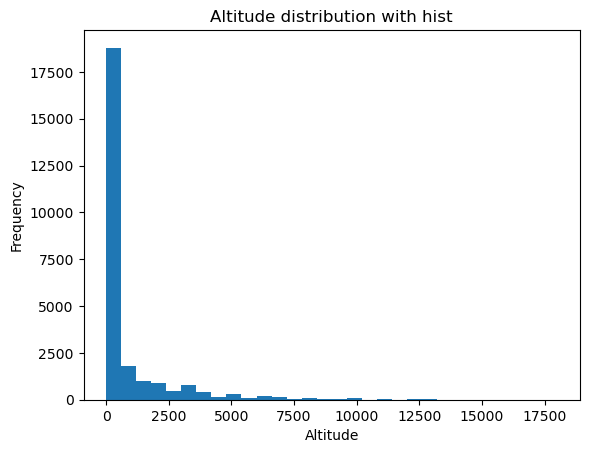

In [39]:
# Visualizing the distribution of numerical data in  column "Altitude" 
num_var  = ["Altitude"]

for i in num_var:
    plt.hist(data[i], bins = 30)
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(i))
    plt.show()

### **Categorical Variables**

#### Finding the Confidence Interval for the mean of Categorical Values

In [42]:
# Summary statistics
description = data["Damage"].value_counts(normalize=True)  # Proportions
n = len(data)  # Total sample size
z = 1.96  # Z-value for 95% confidence level

print("Proportions and 95% Confidence Intervals for Categorical Values:")

# Calculate confidence intervals for each category
for category, p in description.items():
    standard_error = math.sqrt((p * (1 - p)) / n)  # Standard Error
    margin_of_error = z * standard_error  # Margin of Error
    lwr_bound = p - margin_of_error  # Lower bound
    upr_bound = p + margin_of_error  # Upper bound
    
    print(f"{category}: Proportion = {p:.3f}, CI = [{lwr_bound:.3f}, {upr_bound:.3f}]")

Proportions and 95% Confidence Intervals for Categorical Values:
No damage: Proportion = 0.903, CI = [0.900, 0.907]
Caused damage: Proportion = 0.097, CI = [0.093, 0.100]


#### Visualize incidents in relation to Damage

##### Uni-variate Analysis

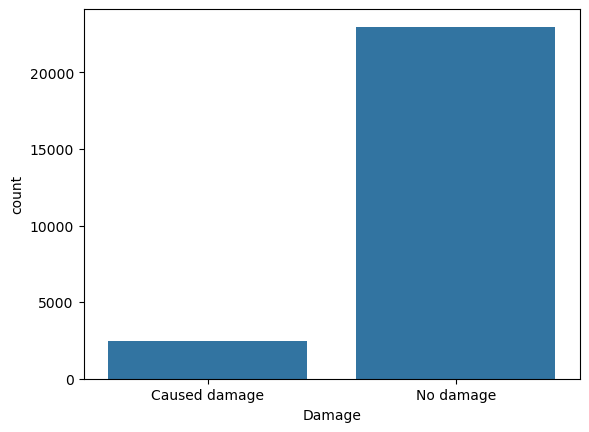

In [45]:
# Countplot to count each unique value in a categorical variable, and plot a bar chart.
sns.countplot(x=data["Damage"],data = data);

## **<a id='5'>5. Data Quality Assessment</a>** 
<div style="text-align: right"><a href="#top">Go to Top</a><div>

### **Missing Data**

In [48]:
# Check data for missing values
data.isnull().sum()

RecordID                        0
AircraftType                    0
AirportName                     0
AltitudeBin                     0
MakeModel                       0
NumberStruck                    0
NumberStruckActual              0
Effect                      23351
FlightDate                      0
Damage                          0
Engines                       234
Operator                        0
OriginState                   449
FlightPhase                     0
ConditionsPrecipitation     23414
RemainsCollected?               0
RemainsSentToSmithsonian        0
Remarks                      4761
WildlifeSize                    0
ConditionsSky                   0
WildlifeSpecies                 0
PilotWarned                     0
Cost                            0
Altitude                        0
PeopleInjured                   0
IsAircraftLarge?                0
dtype: int64

<Axes: >

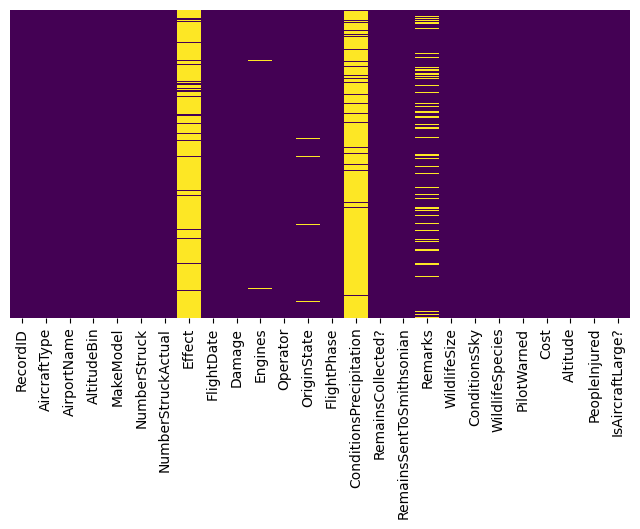

In [49]:
# Visual representation of missing values
plt.figure(figsize=(8, 4))          # set plot size for better visualization
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Observations:

The findings reinforce what was discussed before: 
1. Columns "Effect" and "ConditionsPrecipitation" have over 90% missing values. "Effect" feature will be dropped.
2. In column "Remarks" approximately only 19% of the values are null, but as seen before, the information in this column is not pertinent to this analysis.
3. As for "Engines" and "OriginState", rows containing null on unusable values will be dealt accordingly.

### **Balanced Data**

Get information about balanced or imbalanced data sets which may affect the preprocessing or algorithm.

#### Damage - Feature

In [55]:
# Display all unique values found in the feature
print(data["Damage"].unique())

['Caused damage' 'No damage']


In [56]:
# Counts of each category in the 'Damage' column
data["Damage"].value_counts()

Damage
No damage        22975
Caused damage     2454
Name: count, dtype: int64

In [57]:
# Percentages
data["Damage"].value_counts()/data.shape[0]*100

Damage
No damage        90.349601
Caused damage     9.650399
Name: count, dtype: float64

#### Observations:

Of 25429 incidents, 2454 caused damage, accounting for only 9.65% of the data. This indicates a strong imbalance.

### **Duplicates**

#### WildlifeSpecies and WildlifeSize - Features:

In [62]:
 print(data[['WildlifeSpecies', 'WildlifeSize']]) 

             WildlifeSpecies WildlifeSize
0      Unknown bird - medium       Medium
1                Rock pigeon        Small
2          European starling        Small
3          European starling        Small
4          European starling        Small
...                      ...          ...
25424                Mallard       Medium
25425   Unknown bird - large        Large
25426           Tree swallow        Small
25427  Unknown bird - medium       Medium
25428        Red-tailed hawk       Medium

[25429 rows x 2 columns]


The WildlifeSpecies feature indicates the animal species involved in the incident and sometimes includes information about its size. WildlifeSize provides only the size of the animal involved. Due to this, it would be safe to either ignore 'WildlifeSpecies' (since we see later that many fields have "Unknown" as a description) or extract the pertinent data.

### **Outliers**

#### Cost - Features:

Prepare "Cost" data for analysis. 
- Clean data by removing commas
- Create new column "CostAsFloat" with converted data.

In [67]:
# Add a column where 'Cost' column is converted to float
data['CostAsFloat'] = data['Cost'].replace({',': ''}, regex=True)
data['CostAsFloat'] = data['CostAsFloat'].astype(float)
print(data['CostAsFloat'].dtype)

float64


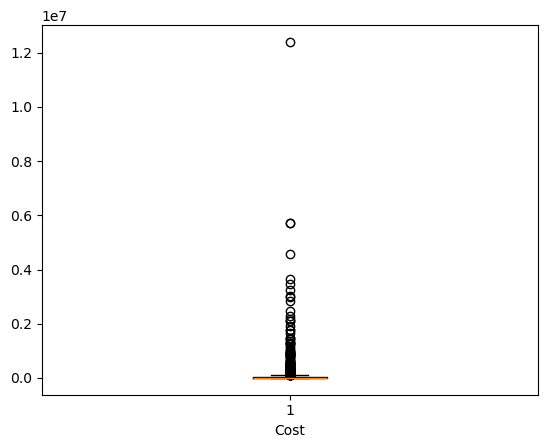

In [68]:
# Exclude zeros from the analysis, as they represent incidents with no damage.
filtered_cost = data['CostAsFloat'][data['CostAsFloat'] != 0]

plt.boxplot(filtered_cost)
plt.xlabel("Cost")
plt.show()


Note that in certain situations, as we see here, outliers should not be removed. When the data is highly skewed, extreme values may be representative of the distribution's tail. Removing them could lead to a loss of valuable information. 

- Over 20000 of the incidents caused no damage, while less than 5000 did caused damage. Reiterates the infoermations seen above.

## **<a id='6'>6. Patterns and Relationships</a>** 
<div style="text-align: right"><a href="#top">Go to Top</a><div>

Analyzing dataset features:

### A. FlightPhase, Altitude - Features

Visualize the relationship between Altitude and FlightPhase

<Axes: xlabel='FlightPhase', ylabel='Altitude'>

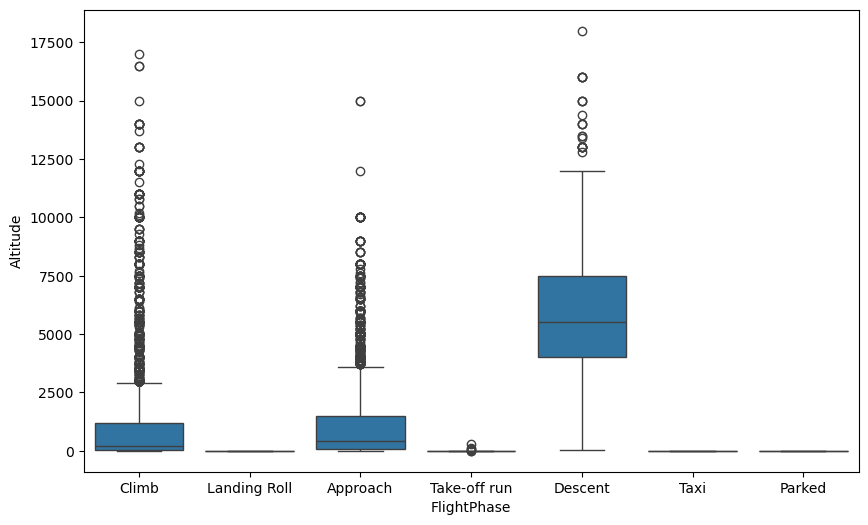

In [75]:
# Create a boxplot to visualize the relationship between Altitude and FlightPhase
plt.figure(figsize=(10, 6))
sns.boxplot(x='FlightPhase', y='Altitude', data=data)

Countplot

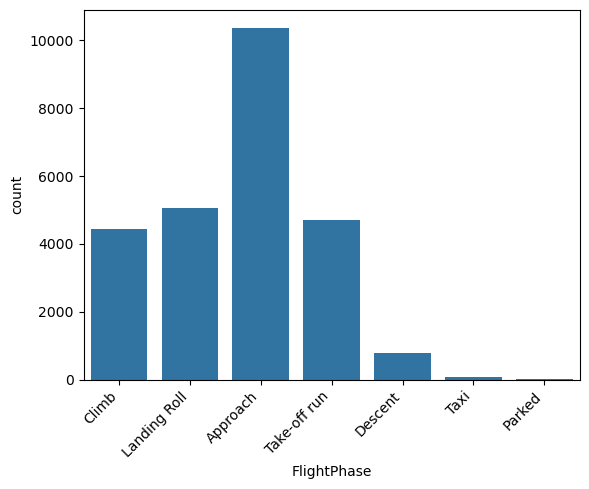

In [77]:
sns.countplot(x = "FlightPhase", data = data)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

#### Observations:

- Over 10000 incidents happened during Approach, which is when the aircraft aligns with the runway and prepares to land.
- Above 4000 incidents took place at each of the following phases: Climb, Landing Roll, and Take-off run.
- Although not many, incidents happened during the Parking and Taxi phases. 

##### Plot the Heatmap

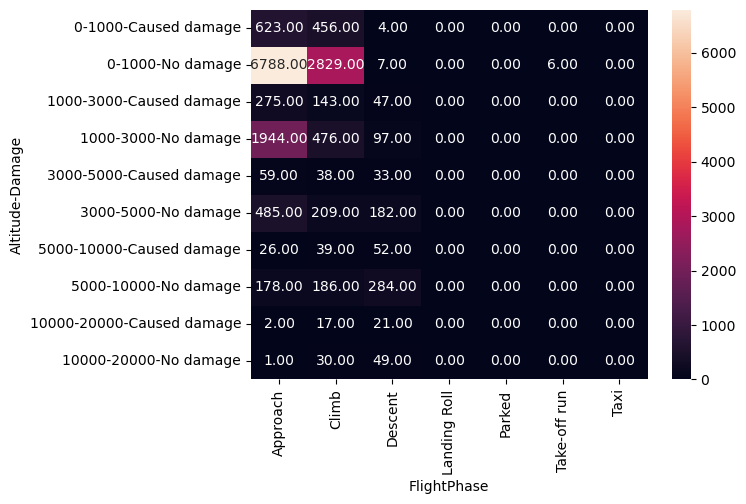

In [81]:
# Create bins for Altitude
bins = [0, 1000, 3000, 5000, 10000, 20000]  # Define bins for Altitude
labels = ['0-1000', '1000-3000', '3000-5000', '5000-10000', '10000-20000']  # Labels for bins
data['Altitude'] = pd.cut(data['Altitude'], bins=bins, labels=labels)
data['FlightPhase'] = data['FlightPhase'].astype(str)

# Group the dataset by Altitude and Damage
group = data.groupby(['Altitude', 'Damage', 'FlightPhase'], observed=False)
altitude_damage = group.size().unstack()

# Heatmap - Color encoded 2D representation of data.
sns.heatmap(altitude_damage, annot = True, fmt=".2f");

##### Visualize count in Flight Phase and Altitude levels (both are linked)

FlightPhase   Damage       
Approach      Caused damage     985
              No damage        9397
Climb         Caused damage     694
              No damage        3735
Descent       Caused damage     157
              No damage         619
Landing Roll  Caused damage     236
              No damage        4811
Parked        Caused damage       2
              No damage           8
Take-off run  Caused damage     376
              No damage        4335
Taxi          Caused damage       4
              No damage          70
dtype: int64


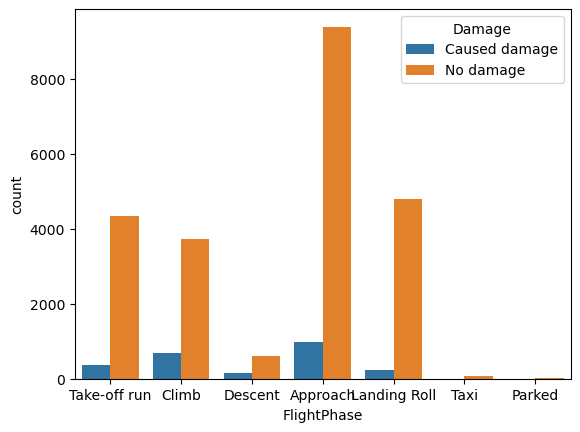

In [83]:
# Creates a countplot to visualize the count of incidents based on FlightPhase
order_flight = ['Take-off run', 'Climb', 'Descent', 'Approach', 'Landing Roll', 'Taxi', 'Parked'] # events ordered by time
sns.countplot(x = data["FlightPhase"],hue = data["Damage"],data = data, order = order_flight); # from above: order of events 
counts = data.groupby(['FlightPhase', 'Damage']).size() # show exact numbers for reference
print(counts) 

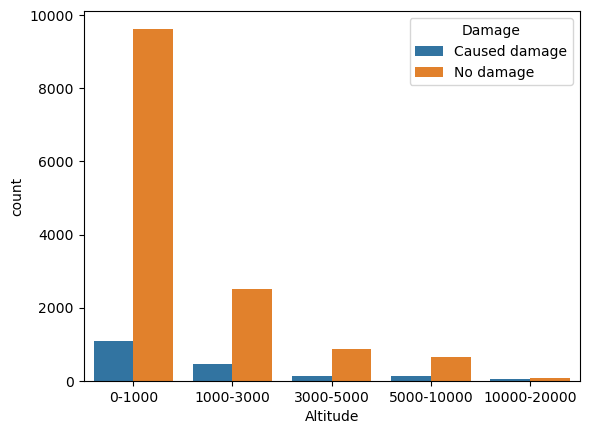

In [84]:
sns.countplot(x = data["Altitude"],hue = data["Damage"],data = data);

##### Show how Damage is distributed across Flight Phase and Altitude levels

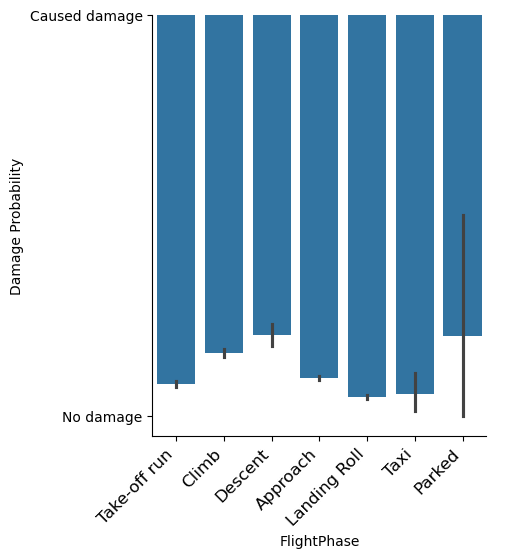

In [86]:
# Categorical plot: bar, showing the average probability of damage for each category of wildlife size
g = sns.catplot(x = "FlightPhase", y = "Damage", data = data, kind = "bar", order = order_flight)
g.set_ylabels("Damage Probability")
g.set_xticklabels(g.ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.show()

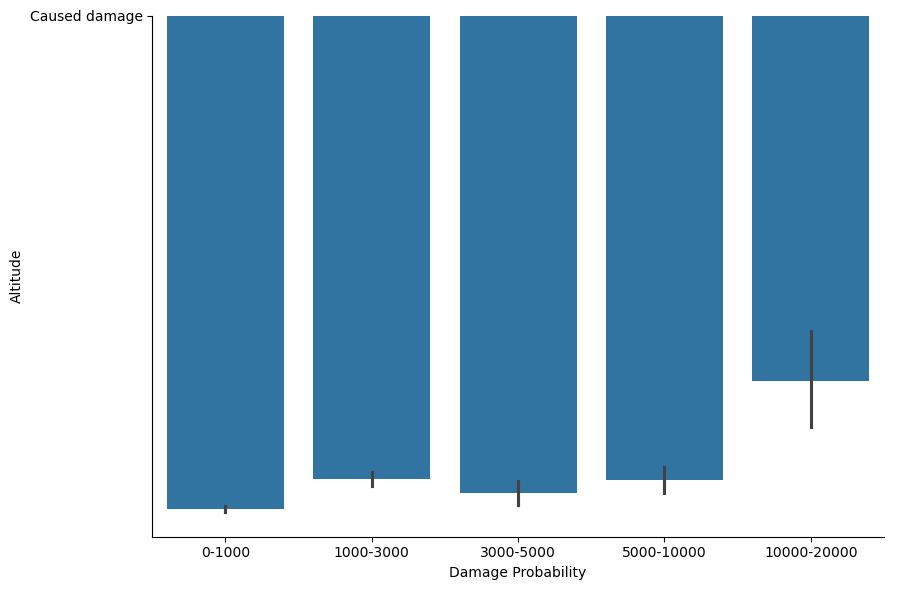

In [87]:
g = sns.catplot(x = "Altitude", y = "Damage", data = data, kind = "bar", height=6, aspect=1.5)
g.set_xlabels("Damage Probability")
g.set_ylabels("Altitude")
plt.show()

##### Pie chart displaying the proportion of incidents at each Flight Phase

In [89]:
# Fetch the classes in Flight Phase
data['FlightPhase'].unique()

array(['Climb', 'Landing Roll', 'Approach', 'Take-off run', 'Descent',
       'Taxi', 'Parked'], dtype=object)

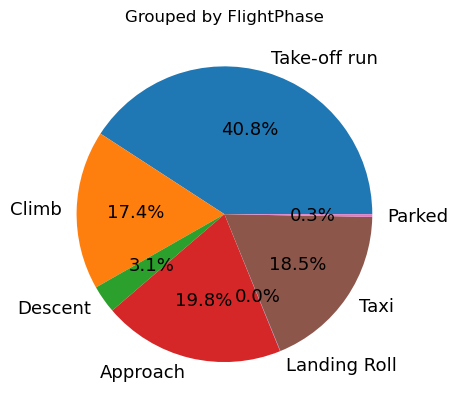

In [90]:
# Generate a pie chart to visualize the distribution of incidents across different Flight Phases
pclass_count = data.groupby('FlightPhase')['FlightPhase'].count()
plt.title('Grouped by FlightPhase')
# Order the flight phases according to the typical sequence of a flight
plt.pie(pclass_count.values, labels=['Take-off run', 'Climb', 'Descent', 'Approach', 'Landing Roll', 
       'Taxi', 'Parked'], autopct='%1.1f%%', textprops={'fontsize':13});

#### Observations:

1. The data shows that most of the incidents take place during the Take-off run phase, compared to the remaining phases. Although most of these incidents caused no damage to the aircraft.
2. Almost equal number of incidents take place during Climb, Taxi, and Approach.
3. During the Descent phase, fewer incidents occurred, maybe because the airplane didn't find many birds at that altitude. But, during this phase, more incidents resulted in damage.
4. The number of incidents in each phase corresponds to the altitude at which birds are most likely to be present.

#### **Correlation**
Data shows that most incidents took place during Approach, although the vast majoprity did not caused damages.

#### **Trend**
The trend suggests that more incidents occurred during the Approach phase, but these incidents were generally less severe and caused no damage. On the other hand, fewer incidents took place during the Descent phase, but there was a higher likelihood of these incidents resulting in damage. 

Note: This could be due to the nature of the incidents or the fact that there are fewer obstacles like birds at lower altitudes during descent.

### B. Pilots Warned - Feature

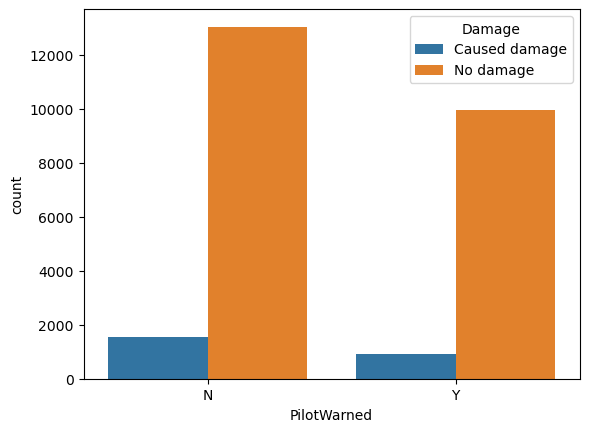

In [96]:
# Count plot shows the count of incidents for each combination of PilotWarned and Damage, 
# making it easy to see any posible relationship between whether the pilot was warned and whether damage occurred
sns.countplot(x =data["PilotWarned"],hue = data["Damage"],data = data);

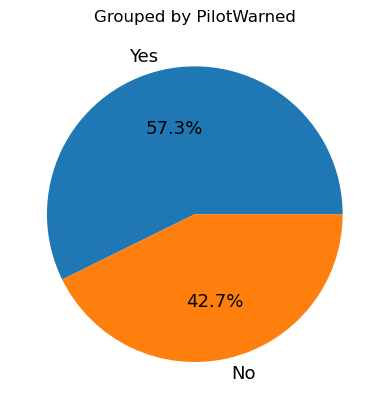

In [97]:
# Pie chart displaying the proportion of incidents where the pilot was warned ("Yes") and where the pilot was not warned ("No").
pclass_count = data.groupby('PilotWarned')['PilotWarned'].count()
plt.title('Grouped by PilotWarned')
plt.pie(pclass_count.values, labels=['Yes', 'No'], autopct='%1.1f%%', textprops={'fontsize':13});

Explore the counts of PilotWarned and Damage

In [99]:
# Extract the year from 'FlightDate'
data['FlightDate'] = pd.to_datetime(data['FlightDate'], format='%m/%d/%y %H:%M', errors='coerce') # format for usability
data['FlightYear'] = data['FlightDate'].dt.year # extract the year

# Group by 'FlightYear', 'PilotWarned', and 'Damage'. Count the occurrences
count_pilotwarned_damage_year = data.groupby(['FlightYear', 'PilotWarned', 'Damage']).size().reset_index(name='Counts')

print(count_pilotwarned_damage_year)

    FlightYear PilotWarned         Damage  Counts
0         2000           N  Caused damage     146
1         2000           N      No damage     789
2         2000           Y  Caused damage      50
3         2000           Y      No damage     382
4         2001           N  Caused damage      88
5         2001           N      No damage     707
6         2001           Y  Caused damage      35
7         2001           Y      No damage     400
8         2002           N  Caused damage     123
9         2002           N      No damage     976
10        2002           Y  Caused damage      63
11        2002           Y      No damage     519
12        2003           N  Caused damage     117
13        2003           N      No damage     889
14        2003           Y  Caused damage      84
15        2003           Y      No damage     478
16        2004           N  Caused damage     117
17        2004           N      No damage     951
18        2004           Y  Caused damage      67


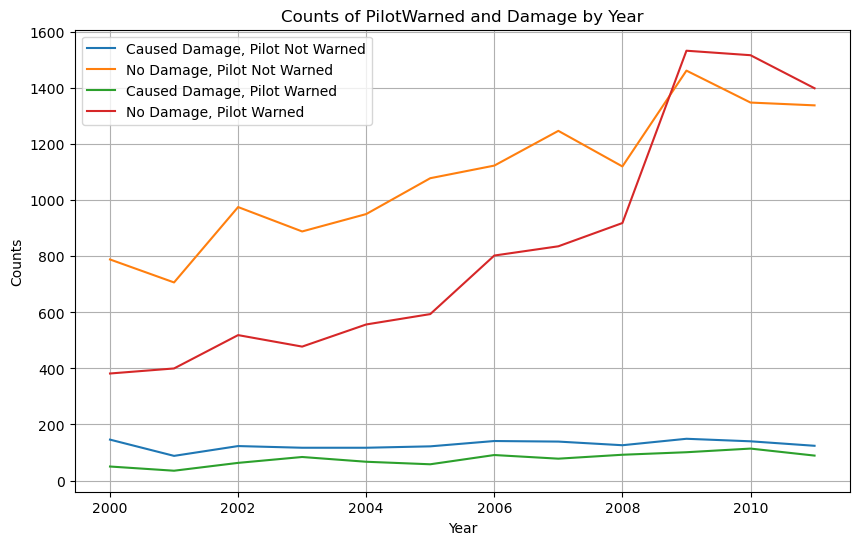

In [100]:
# Plotting a line chart

# Pivot to have 'PilotWarned' and 'Damage' for plotting
pivot_data = count_pilotwarned_damage_year.pivot_table(index='FlightYear', 
                                                          columns=['PilotWarned', 'Damage'], 
                                                          values='Counts', 
                                                          fill_value=0)

plt.figure(figsize=(10, 6))

# Legend labels
label_mapping = {
    ('N', 'No damage'): 'No Damage, Pilot Not Warned',
    ('N', 'Caused damage'): 'Caused Damage, Pilot Not Warned',
    ('Y', 'No damage'): 'No Damage, Pilot Warned',
    ('Y', 'Caused damage'): 'Caused Damage, Pilot Warned'
}

# Plot for 'N' and 'Y' PilotWarned, and damage 
for col in pivot_data.columns:
    pilot_warned, damage = col  
    label = label_mapping.get((pilot_warned, damage), f'{pilot_warned} - {damage}')
    plt.plot(pivot_data.index, pivot_data[col], label=label)  # Use custom label

# Add title, labels, grid, and legend for readability 
plt.title('Counts of PilotWarned and Damage by Year')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.grid(True)
plt.legend()
plt.show()

#### Observations:

1. The charts above confirm the expected trend: incidents where pilots were warned caused less damage compared to those where pilots were not warned.
2. However, the instances in which pilots were warned account for only 15% more of the total incidents.


#### **Correlation**
For incidents that did not cause damage, the number of incidents when the pilot was warned was significantly lower before 2009. 
In contrast, for incidents causing damage, there was no substantial difference between the incidents when the pilot was warned and when they were not.

### C. Engine - Feature 

- Engine feature contains null values. These will be filled with the median, or the most frequent value.

In [106]:
# Finding the mode (most frequently value) in  "Engines"
most_frequent = data['Engines'].mode()[0]
print(most_frequent)

2


Visualize the distribution, we'll remove null values.

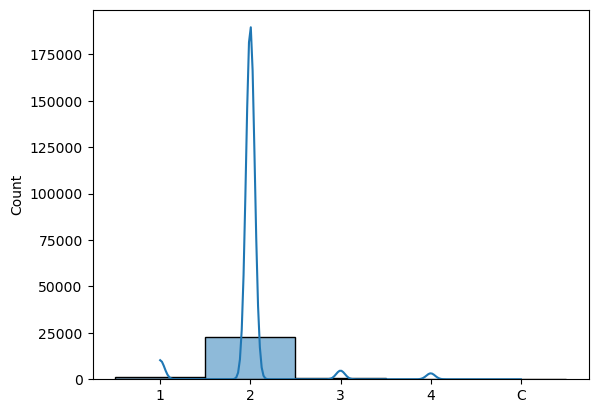

In [108]:
engines = data[data['Engines'].notnull()]['Engines'].values
engines_sorted = sorted(engines)
sns.histplot(engines_sorted,kde = True);

#### Faceted plot, each plot corresponds to a different subset of the data based on the "Engine" column.

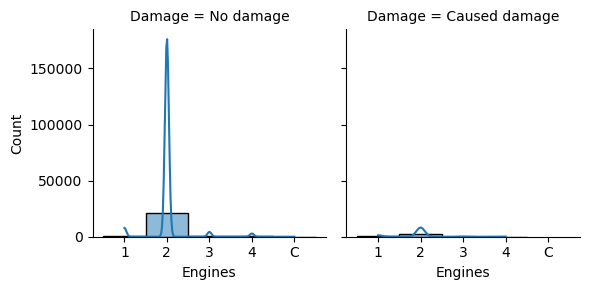

In [110]:
# Sort the data by "Engines" in ascending order
sorted_data = data.sort_values(by="Engines")

# Create the FacetGrid
g = sns.FacetGrid(sorted_data, col = "Damage")
g.map(sns.histplot, "Engines", bins = 25, kde = True)
plt.show()

#### Plotting Probability Density Functions (PDFs) for 'Engines' based on the 'Damage' column

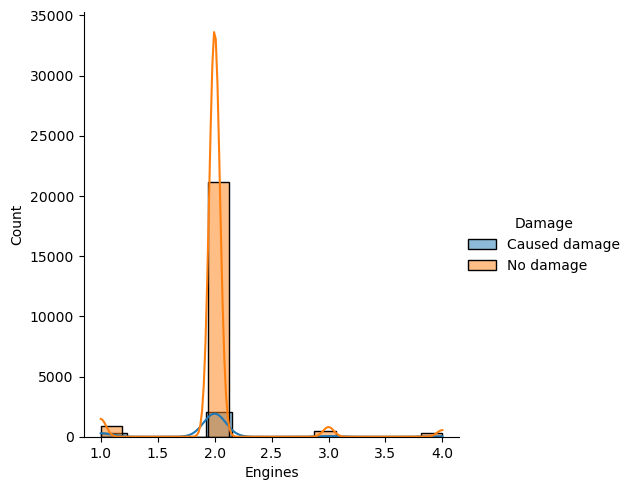

In [112]:
# Filling null values:
data['Engines'] = pd.to_numeric(data['Engines'], errors='coerce') # Replace non-numeric values with NaN

mode_value = data['Engines'].mode()[0]  # Get the most frequent value (mode) for the 'Engines' column

data['Engines'] = data['Engines'].fillna(mode_value)  # Fill null values in 'Engines' column with the mode value

# Plotting PDFs for 'Engines' based on the 'Damage' column
sns.FacetGrid(data, hue="Damage", height=5) \
    .map(sns.histplot, "Engines", kde=True) \
    .add_legend()
plt.show()

#### Violin plot

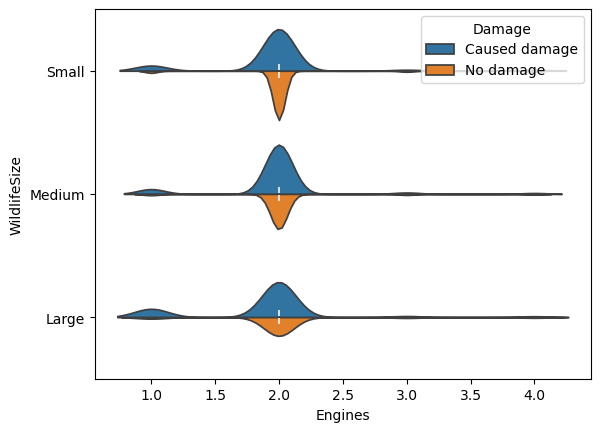

In [114]:
# Displaying the distribution of 'WildlifeSize' across different number of 'Engines' in the aircraft.
size_order = ['Small', 'Medium', 'Large']
sns.violinplot(x ="Engines", y ="WildlifeSize", hue ="Damage",
data = data, split = True, order=size_order);

In [115]:
# Analyze how "Engines" is distributed in relation to other variables
# Note: 'Caused damage' -> 1, 'No damage' -> 0
print(pd.pivot_table(data, index = 'Damage', columns = 'NumberStruckActual',
                     values = 'Engines' ,aggfunc ='count'))
print()
print(pd.pivot_table(data, index = 'Damage', columns = 'PeopleInjured', 
                     values = 'Engines' ,aggfunc ='count'))
print()
print(pd.pivot_table(data, index = 'Damage', columns = 'IsAircraftLarge?', 
                     values = 'Engines' ,aggfunc ='count'))

NumberStruckActual      1      2      3      4      5      6      7      8    \
Damage                                                                         
Caused damage        1789.0   71.0   61.0   63.0   69.0   57.0   63.0   66.0   
No damage           19001.0  396.0  408.0  420.0  467.0  406.0  432.0  392.0   

NumberStruckActual    9      10   ...  99   100  227  261  320  424  537  806  \
Damage                            ...                                           
Caused damage        66.0   68.0  ...  NaN  NaN  1.0  NaN  1.0  1.0  NaN  NaN   
No damage           421.0  393.0  ...  4.0  1.0  NaN  1.0  NaN  NaN  1.0  1.0   

NumberStruckActual  859  942  
Damage                        
Caused damage       1.0  NaN  
No damage           NaN  1.0  

[2 rows x 106 columns]

PeopleInjured        0    1    2    6
Damage                               
Caused damage   2441.0  9.0  3.0  1.0
No damage      22975.0  NaN  NaN  NaN

IsAircraftLarge?     No   Yes
Damage                

#### Observations:

1. NumberStruckActual: Most incidents had only 1 actual struck.
2. PeopleInjured - Here we see that in 13 events people were injured.
3. IsAircraftLarge? - Most incidents with no damage involved smaller aircraft. Large aircraft, have a higher count in the non-damaging incidents but are involved less in the damaging incidents.

#### Bi-variate analysis 

Box Plot

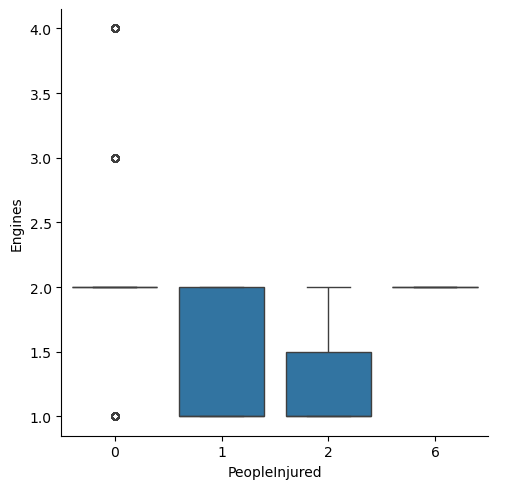

In [120]:
# Visualize the distribution of "Engines" for each category of "PeopleInjured"
sns.catplot(x = "PeopleInjured", y = "Engines", data = data, kind = "box")
plt.show()

The number of engines is not a factor to be considered for people getting ingured.

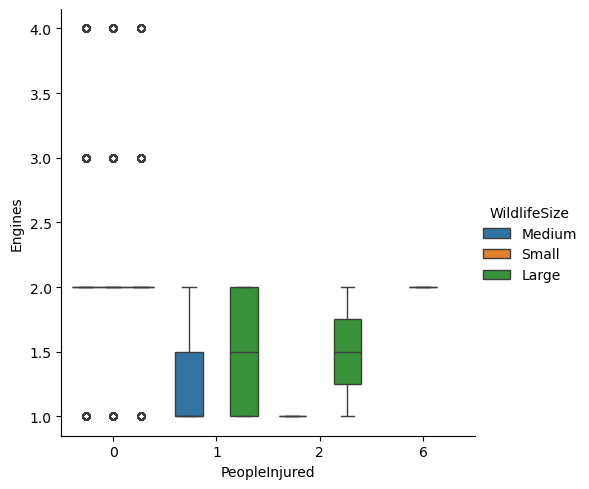

In [122]:
# Examine the distribution of "Engines" for each value of "PeopleInjured", grouped by "WildlifeSize"
sns.catplot(x = "PeopleInjured", y = "Engines", hue = "WildlifeSize",data = data, kind = "box")
plt.show()

The number of engines did not appear to affect the number of people injured. While it seems that larger wildlife sizes had a greater impact on 1-engine aircraft, we know that in the incident where 6 people were injured, small wildlife was involved. Additionally, the number of incidents with injured people is not large enough to draw definitive conclusions (Fortunately, there have not been many dangerous incidents).

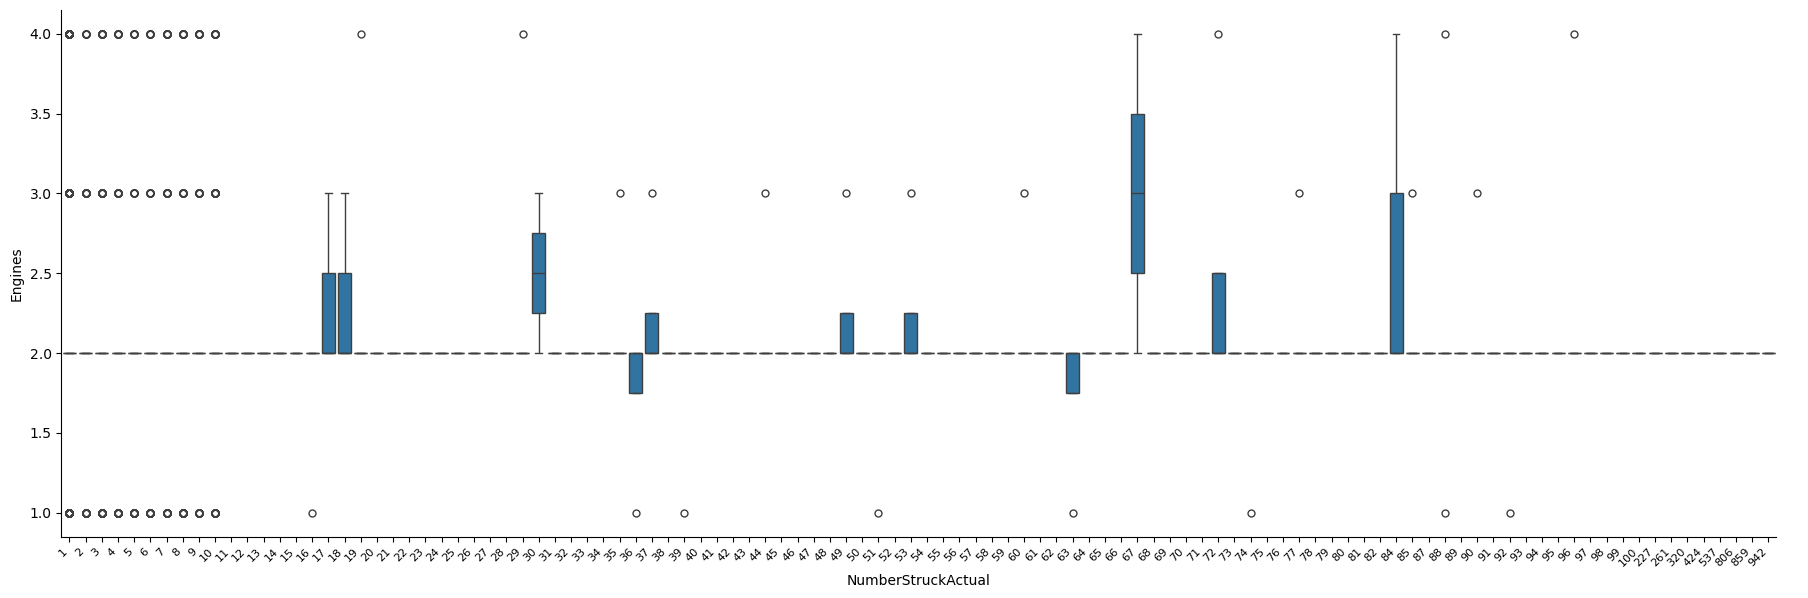

In [124]:
# Visualize the distribution of "Engines" for each category of "NumberStruckActual"
#sns.catplot(x = "PeopleInjured", y = "Engines", data = data, kind = "box")
sns.catplot(x = "NumberStruckActual", y = "Engines", data = data, kind = "box", height=6, aspect=3)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.show()

There does not seem to be a relation within how different amount of birds struck damage engines, as the incidents with high amounts of birds were not many.

#### Observations:

1. Most of the incidents involved 2 engine aircraft. 
2. Of those incidents, most did not result in damages.
3. As for aircraft with 1, 3, and 4 engines, the difference between the resulting damage/no damage was not as great.
4. Interestingly, the violin plot shows that when the incident involved a 2-engine aircraft and resulted in damage, medium-sized wildlife caused similar damage than the large size.

#### **Correlation**
The data shows weak correlations overall, with some indications that 2-engine aircraft are involved in more incidents, and larger aircraft are less likely to experience damaging incidents.

#### **Trend**
The trend suggests that two-engine aircraft have been involved in a higher number of incidents. 

Note: This could imply that two-engine aircraft are more prone to incidents, or it could be that there are simply more of these aircraft in existence, leading to a higher number of incidents.

### D. ConditionsPrecipitation - Feature

Note that this feature contains only 2,015 non-null values, so the analysis is preliminary and should be interpreted with caution

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Snow'),
  Text(1, 0, 'Fog'),
  Text(2, 0, 'Rain'),
  Text(3, 0, 'Fog, Rain'),
  Text(4, 0, 'Rain, Snow'),
  Text(5, 0, 'Fog, Rain, Snow'),
  Text(6, 0, 'Fog, Snow')])

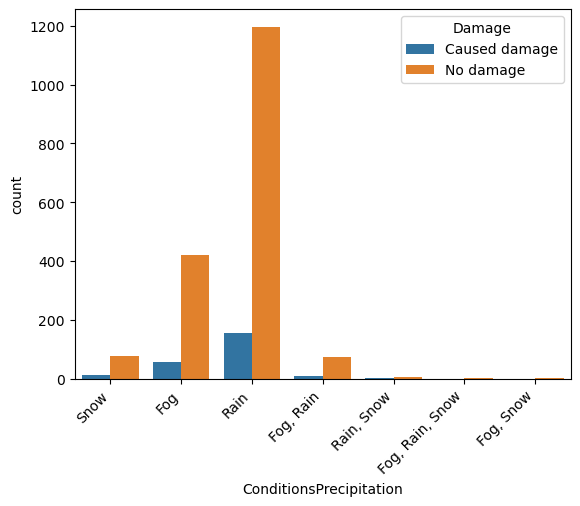

In [131]:
# count plot to visualize the frequency of occurrences
sns.countplot(x = data["ConditionsPrecipitation"],hue = data["Damage"],data = data);
plt.xticks(rotation=45, ha='right', fontsize=10)

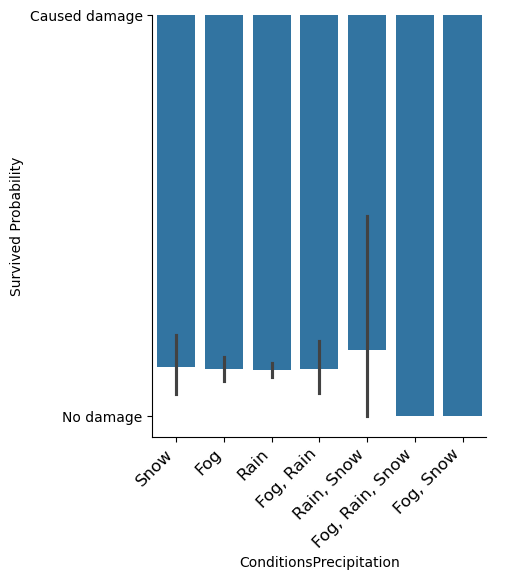

In [132]:
# Visualize the relationship between "ConditionsPrecipitation" and "Damage"
g = sns.catplot(x = "ConditionsPrecipitation", y = "Damage", kind = "bar", data = data)
g.set_ylabels("Survived Probability")
g.set_xticklabels(g.ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.show()

#### Observations:

1. Although the sample data is limited, it provides a reasonable insight into how weather impacts bird-aircraft collision occurrences.2.
2. Most incidents occurred during "Rain", although most did not result in damages. 
3. During "Rain, Snow" conditions, incidents were more likely to cause damage; however, these conditions accounted for only a small number of occurrences.

#### **Trend**
Rain increases the frequency of bird-aircraft collisions, but these incidents are generally less likely to cause damage. However, when rain and snow conditions are present, incidents are more likely to result in damage, although these conditions occur less frequently.

### E. MakeModel - Feature 

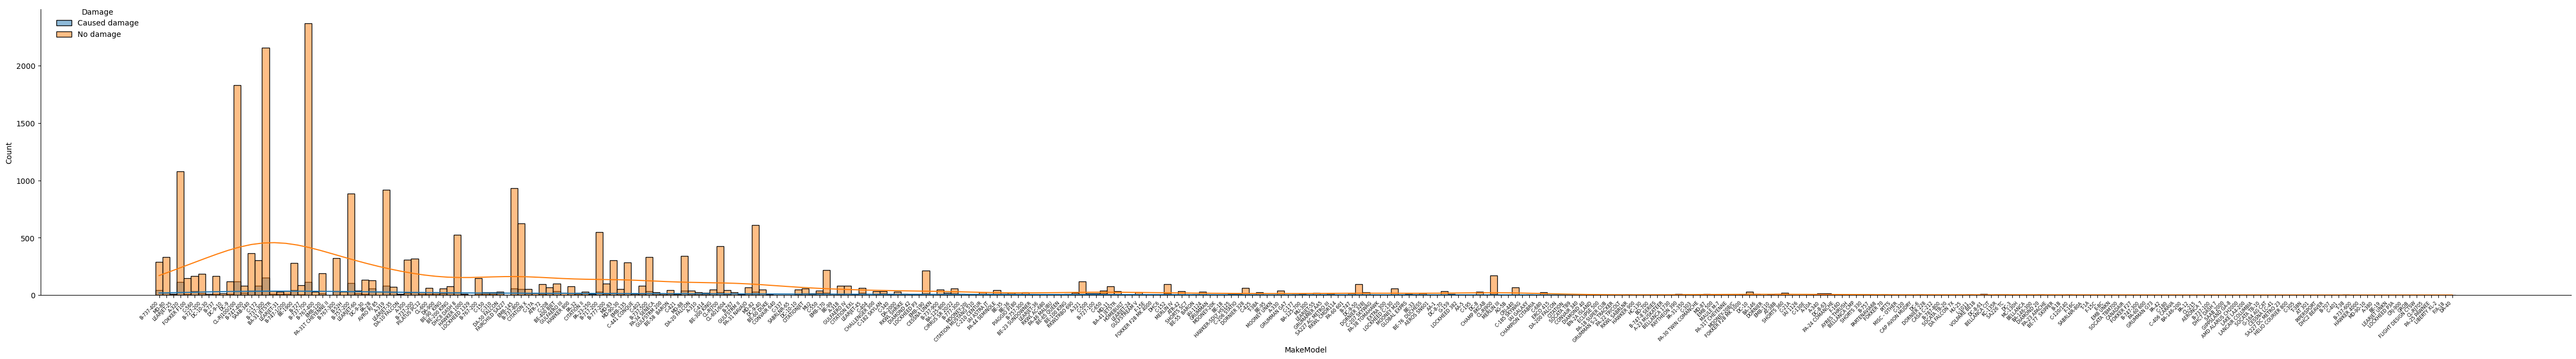

In [137]:
# The facet grid plot shows the MakeModel values distribution, across Damage categories.
sns.FacetGrid(data, hue="Damage", height=6, aspect=8) \
   .map(sns.histplot, "MakeModel", kde = True) \
   .add_legend(loc="upper left", bbox_to_anchor=(0.02, 1));
plt.xticks(rotation=45, ha='right', fontsize=6)
plt.show();

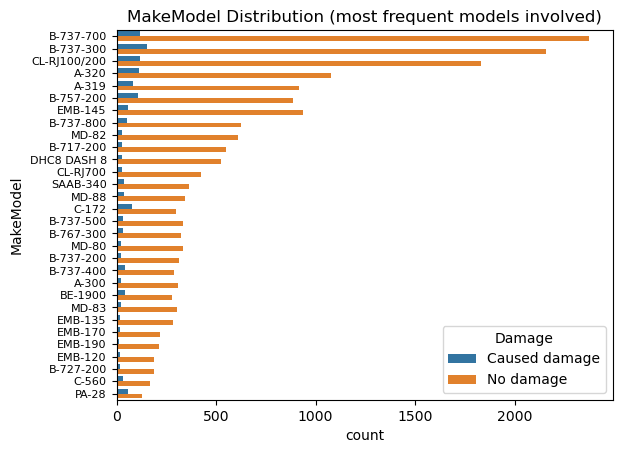

In [138]:
# For visualization will get only the distribution for the most frequent models
freq_models = data['MakeModel'].value_counts().index[:30]
sns.countplot(y='MakeModel', data=data[data['MakeModel'].isin(freq_models)], order=freq_models, hue='Damage')
plt.title('MakeModel Distribution (most frequent models involved)')
plt.yticks(fontsize=8)
plt.show()

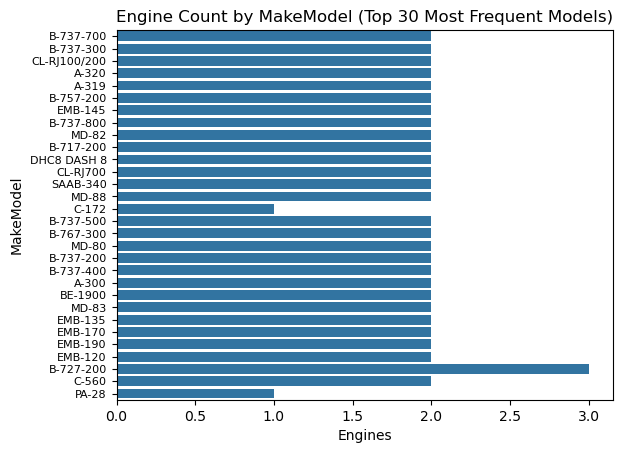

In [139]:
# Get the number of engines for the considered models
engines_per_model = data.groupby('MakeModel')['Engines'].apply(lambda x: x.mode()[0]).reset_index()
engines_filtered = engines_per_model[engines_per_model['MakeModel'].isin(freq_models)]
sns.barplot(y='MakeModel', x='Engines', data=engines_filtered, order=freq_models)
plt.title('Engine Count by MakeModel (Top 30 Most Frequent Models)')
plt.yticks(fontsize=8)
plt.show()

#### Observations:

1. Among all the models involved in bird-aircraft collisions, only a small number experienced repeated incidents.
2. Aircraft model B-737-700 (2-engine) had the most incidents.
4. As seen before, most of the models involved in incidents had 2 engines.

#### **Trend**
The trend indicates a strong association between the number of engines and the likelihood of involvement in collision.

Note: As stated before, this could imply that two-engine aircraft are more prone to incidents, or it could be that there are simply more of these aircraft in existence, leading to a higher number of incidents.

### F. NumberStruckActual - Feature

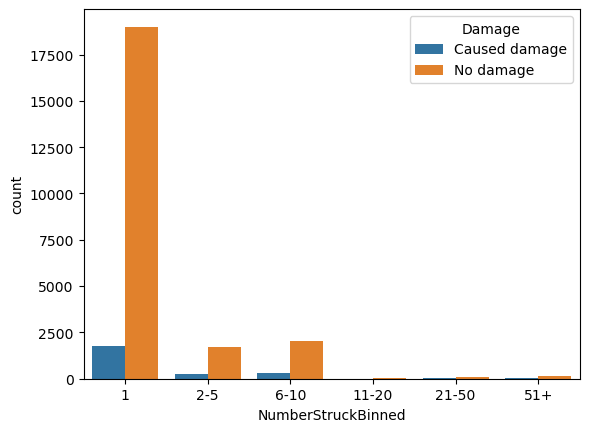

In [144]:
# Plot the countplot with binned number of birds actually struck
bin_edges = [0, 1, 5, 10, 20, 50, 100]
bin_labels = ['1', '2-5', '6-10', '11-20', '21-50', '51+']
data['NumberStruckBinned'] = pd.cut(data['NumberStruckActual'], bins=bin_edges, labels=bin_labels, include_lowest=True)

sns.countplot(x='NumberStruckBinned', hue='Damage', data=data)
plt.show()


##### Pie chart to visualize the distribution of the number of birds struck on a single incident

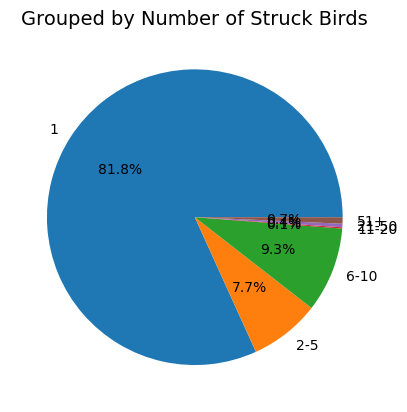

In [146]:
#  Distribution of values from NumberStruckActual
bin_counts = data['NumberStruckBinned'].value_counts().sort_index()
plt.pie(bin_counts, labels=bin_counts.index, autopct='%1.1f%%', textprops={'fontsize': 10})
plt.title('Grouped by Number of Struck Birds', fontsize=14)
plt.show()

#### Multivariate analysis

Correlation Between NumberStruckActual, Damage, Engines, IsAircraftLarge? and PeopleInjured

In [149]:
# Count of values in feature
data["Damage"].value_counts()

Damage
No damage        22975
Caused damage     2454
Name: count, dtype: int64

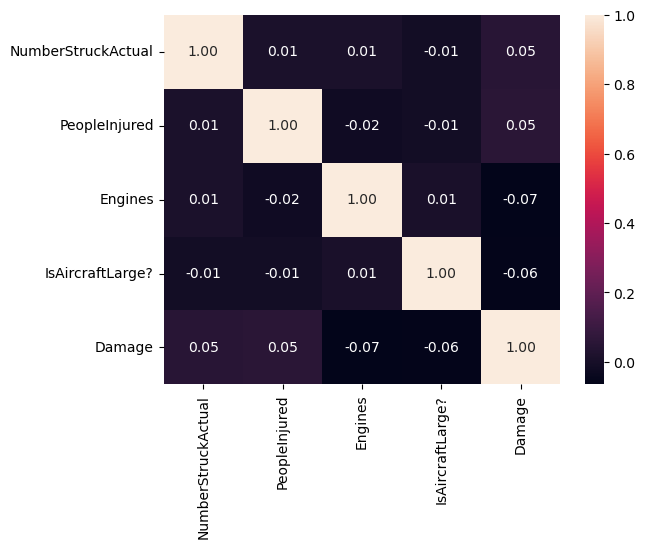

In [150]:
# Convert 'Damage' column to numeric: 'Caused damage' -> 1, 'No damage' -> 0
data['Damage'] = data['Damage'].map({'Caused damage': 1, 'No damage': 0})
data['IsAircraftLarge?'] = data['IsAircraftLarge?'].map({'Yes': 1, 'No': 0})
# Select columns for the heatmap
list1 = ["NumberStruckActual", "PeopleInjured", "Engines", "IsAircraftLarge?", "Damage"]

# Plot the heatmap of correlations
sns.heatmap(data[list1].corr(), annot=True, fmt=".2f")
plt.show()


The inference we can draw from this table is:

    The heatmap shows there is little correlation between the considered factors.
    There is some negative correlation between the number of Engines and Damage. As we've seen the 2-engine aircraft had the most incidents.
    There is a very weak positive correlation between Engines and the number of PeopleInjured.

In [152]:
# Identify the relationship between "Damage" and NumberStruckActual among other variables
# Note: 'Caused damage' -> 1, 'No damage' -> 0
pd.pivot_table(data, index = "Damage", values = ["NumberStruckActual", "PeopleInjured", "Engines", "IsAircraftLarge?"])

Engines  IsAircraftLarge?  NumberStruckActual  PeopleInjured
Damage                                                               
0       2.011665          0.339412            2.485745       0.000000
1       1.931540          0.246129            4.702119       0.008557

#### Observations:

1. Over 80% of incidents implied only one bird.
2. The vast majority of incidents where there was only one bird involved,did not cused damage.
3. Overall  ost incidents did not caused damage.

#### **Trend**

The data show that most incidents implied only one bird.

### G. FlightDate - Feature

Explore Trends Over Time: Yearly distribution of bird strike incidents.
We need to group FlightDate column by year

In [158]:
# Note: FlightYear column to show the distribution by year was added on B. FlightPhase - Feature

data.tail()

RecordID AircraftType                      AirportName   AltitudeBin  \
25424    319672     Airplane                  SACRAMENTO INTL       (0, 10]   
25425    321151     Airplane                REDDING MUNICIPAL  (1000, 2000]   
25426    319677     Airplane                     ORLANDO INTL       (-1, 0]   
25427    319679     Airplane  DETROIT METRO WAYNE COUNTY ARPT       (-1, 0]   
25428    319593     Airplane     ABRAHAM LINCOLN CAPITAL ARPT       (-1, 0]   

       MakeModel NumberStruck  NumberStruckActual Effect FlightDate  Damage  \
25424  B-737-700            1                   1    NaN 2011-12-29       0   
25425    EMB-120            1                   1    NaN 2011-12-30       0   
25426      A-321            1                   1    NaN 2011-12-30       0   
25427  B-757-200            1                   1    NaN 2011-12-31       0   
25428  B-737-400            1                   1    NaN 2011-12-31       1   

       ...  ConditionsSky        WildlifeSpecies PilotWarned Cost   Altitude  \
25424  ...       No Cloud                Mallard           Y    0     0-1000   
25425  ...       Overcast   Unknown bird - large           N    0  1000-3000   
25426  ...     Some Cloud           Tree swallow           Y    0        NaN   
25427  ...     Some Cloud  Unknown bird - medium           Y    0        NaN   
25428  ...       No Cloud        Red-tailed hawk           N    0        NaN   

       PeopleInjured  IsAircraftLarge? CostAsFloat FlightYear  \
25424              0                 1         0.0       2011   
25425              0                 0         0.0       2011   
25426              0                 0         0.0       2011   
25427              0                 1         0.0       2011   
25428              0                 1         0.0       2011   

      NumberStruckBinned  
25424                  1  
25425                  1  
25426                  1  
25427                  1  
25428                  1  

[5 rows x 29 columns]

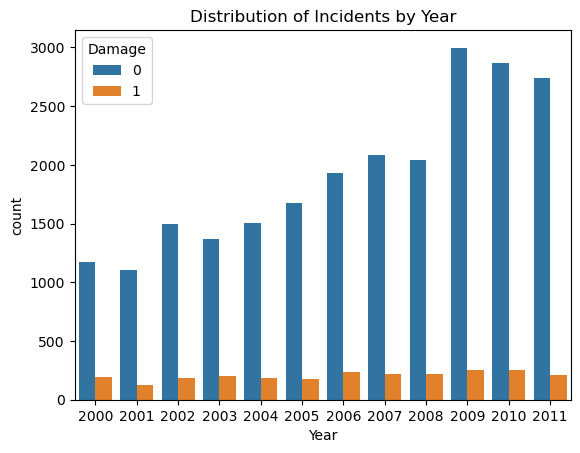

In [159]:
sns.countplot(x = 'FlightYear', data = data, hue='Damage')
plt.title('Distribution of Incidents by Year')
plt.xlabel('Year')
plt.show()

##### Correlation Between Year and Damage 

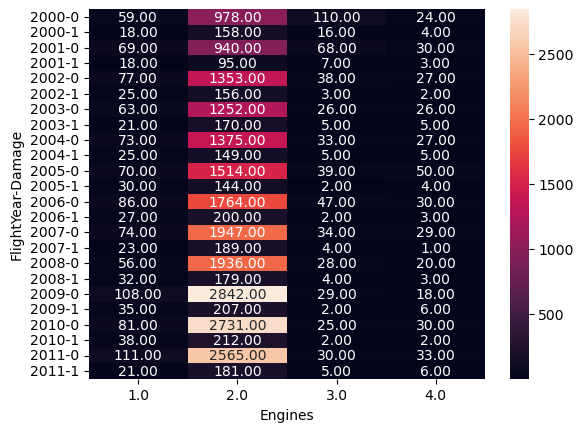

In [161]:
# Group the dataset by FlightYear and Damage
group = data.groupby(['FlightYear', 'Damage', 'Engines'], observed=False)
altitude_damage = group.size().unstack()

# Heatmap - Color encoded 2D representation of data.
sns.heatmap(altitude_damage, annot = True, fmt=".2f");

##### Observations

1. Although most of the incidents took place in 2009, the amount of incidents that caused damage has been very constant through the years.
2. From 2000 to 2008 the incidents gradually increased, before jumping steeply in 2011. After that incidents started decreasing.  

#### **Trend**
The  overall trend is upward. Data shows initial growth over 9 years, followed by a decrease over the next 3 years.

### H. OriginState - Feature

Correlation Between OriginState and Damage for the top 30 incidents

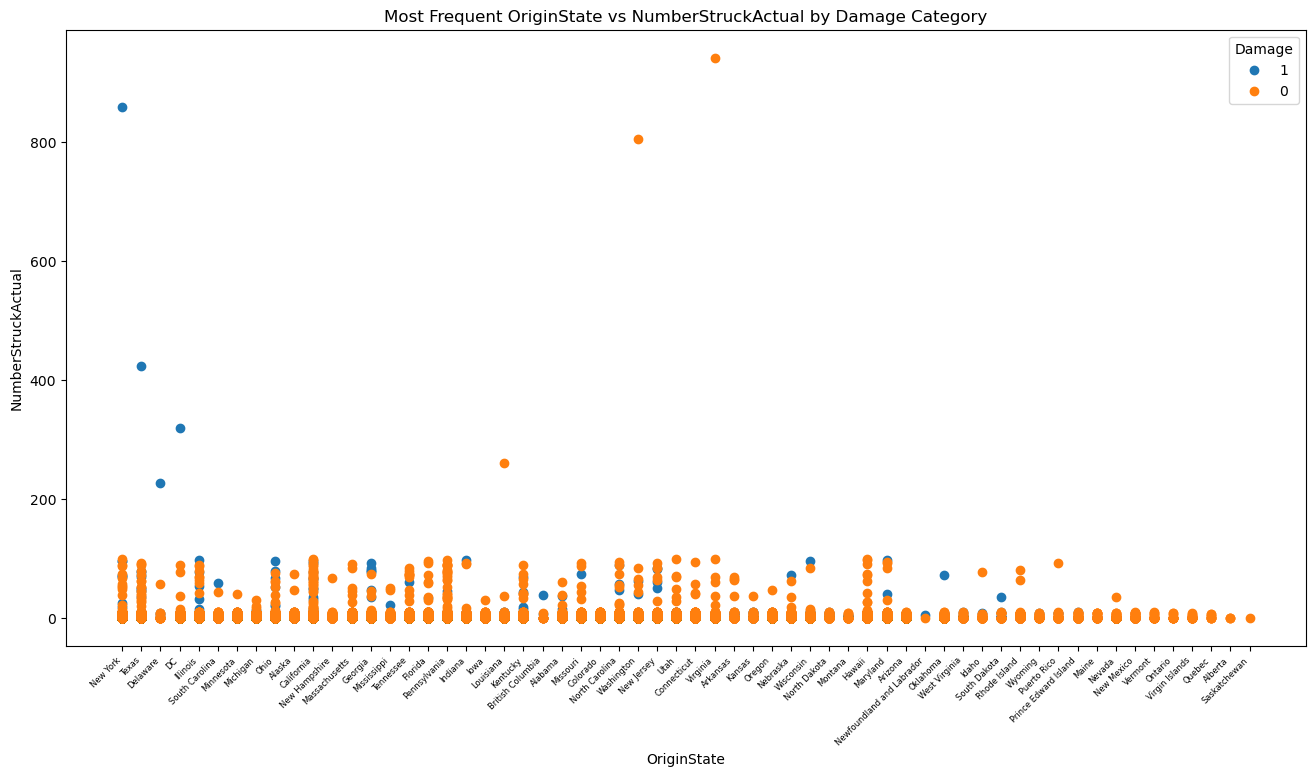

In [167]:
#  Visualize the distribution of "OriginState" values
# Note: 'Caused damage' -> 1, 'No damage' -> 0

# Count the frequency of each OriginState, select the top most frequent
top_freq_states = data['OriginState'].value_counts().head(60).index  # Top 60 frequent OriginStates

# Filter data to include only the most frequent OriginStates
filtered_data = data[data['OriginState'].isin(top_freq_states)].copy()

# Ensure 'Damage' is categorical
filtered_data['Damage'] = filtered_data['Damage'].astype(str)

# Plot:
plt.figure(figsize=(16, 8))  # Adjust size for better visibility

# Scatter plot with filtered data grouped by 'Damage'
for damage_category in filtered_data['Damage'].unique():
    damage_subset = filtered_data[filtered_data['Damage'] == damage_category]
    plt.scatter(damage_subset['OriginState'],
                damage_subset['NumberStruckActual'],
                label=damage_category,
                marker='o')

plt.xlabel('OriginState')
plt.ylabel('NumberStruckActual')
plt.title('Most Frequent OriginState vs NumberStruckActual by Damage Category')
plt.xticks(rotation=45, ha='right', fontsize=6)
plt.legend(title='Damage')

plt.show()


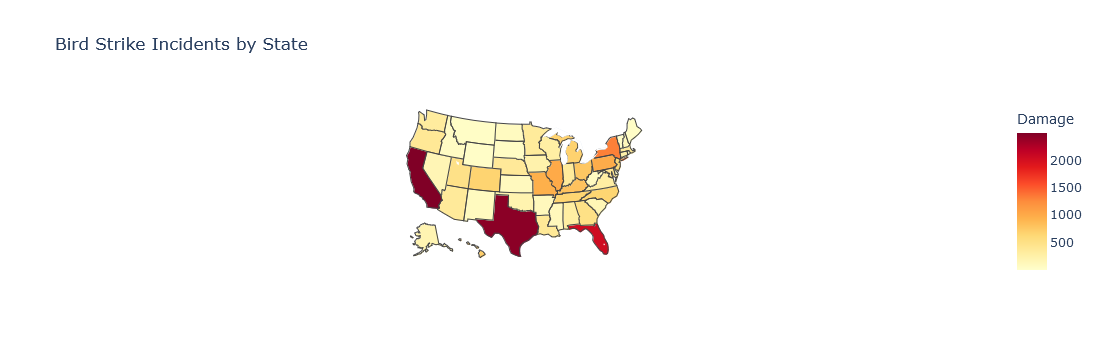

In [168]:
# Choropleth Map
# For creating this map Plotly requires a two-letter state abbreviation to match its state data to the correct geographical regions on the map.
state_name_to_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 
    'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Incident counts
incident_counts = data['OriginState'].value_counts().reset_index()
incident_counts.columns = ['OriginState', 'Damage']
incident_counts['OriginState'] = incident_counts['OriginState'].map(state_name_to_abbrev) # Map full state names to abbreviations
incident_counts['Damage'] = pd.to_numeric(incident_counts['Damage'], errors='coerce') # Ensure 'Damage' column is numeric
incident_counts = incident_counts.dropna(subset=['Damage']) # Drop rows with missing 'Damage' values

# Create the choropleth map
fig = px.choropleth(
    incident_counts, 
    locations='OriginState', 
    locationmode='USA-states',  # Set the location mode to USA states
    color='Damage',  # Color by the number of incidents
    color_continuous_scale='YlOrRd',  # Choose a color scale
    scope='usa',  # Limit the map to USA
    title='Bird Strike Incidents by State'
)
fig.show()



In [169]:
# Get the top 3 states with the highest incident counts
top_3_states = data['OriginState'].value_counts().head(3)

print("Top 3 states with the highest incident counts:")
print(top_3_states)

Top 3 states with the highest incident counts:
OriginState
California    2499
Texas         2445
Florida       2045
Name: count, dtype: int64


#### Comments

1. California, Texas, and Florida are the states with more incidents compared to their countries.
2. It is fair to say that incidents have happened in all of U.S. territory. 

#### **Trend**
The incidents show a localized upward trend in 3 key airports: California, Texas, and Florida.

### I. Cost - Feature

Note: "CostAsFloat" column was added above, on: 5. Data Quality Assessment: Outliers for analysis.

In [175]:
# Add a column where 'Cost' column is converted to float
data.head()

RecordID AircraftType                  AirportName   AltitudeBin  \
0    202152     Airplane                 LAGUARDIA NY  (1000, 2000]   
1    208159     Airplane  DALLAS/FORT WORTH INTL ARPT       (-1, 0]   
2    207601     Airplane            LAKEFRONT AIRPORT      (30, 50]   
3    215953     Airplane          SEATTLE-TACOMA INTL      (30, 50]   
4    219878     Airplane                 NORFOLK INTL      (30, 50]   

      MakeModel NumberStruck  NumberStruckActual                 Effect  \
0     B-737-400     Over 100                 859       Engine Shut Down   
1         MD-80     Over 100                 424                    NaN   
2         C-500     Over 100                 261                    NaN   
3     B-737-400     Over 100                 806  Precautionary Landing   
4  CL-RJ100/200     Over 100                 942                    NaN   

  FlightDate  Damage  ...  ConditionsSky        WildlifeSpecies PilotWarned  \
0 2000-11-23       1  ...       No Cloud  Unknown bird - medium           N   
1 2001-07-25       1  ...     Some Cloud            Rock pigeon           Y   
2 2001-09-14       0  ...       No Cloud      European starling           N   
3 2002-09-05       0  ...     Some Cloud      European starling           Y   
4 2003-06-23       0  ...       No Cloud      European starling           N   

     Cost   Altitude  PeopleInjured  IsAircraftLarge? CostAsFloat FlightYear  \
0  30,736  1000-3000              0                 1     30736.0       2000   
1       0        NaN              0                 0         0.0       2001   
2       0     0-1000              0                 0         0.0       2001   
3       0     0-1000              0                 1         0.0       2002   
4       0     0-1000              0                 0         0.0       2003   

  NumberStruckBinned  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  

[5 rows x 29 columns]

Create a histogram to visualize the distribution of Cost

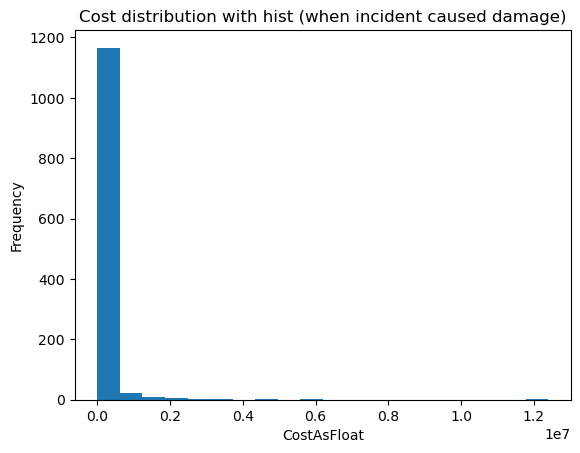

In [177]:
num_var  = ["CostAsFloat"]

for i in num_var:
    data_filtered = data[data[i] != 0] # filter data for no damage or 0 cost
    plt.hist(data_filtered[i], bins=20)
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.title("Cost distribution with hist (when incident caused damage)".format(i))
    plt.show()

In [178]:
# Exploring the 5 most expensive incidents
num_var = ["CostAsFloat"]

top_n = 5  # 5 most expensive values to display

for i in num_var:
    top_values = data.nlargest(top_n, i)
    print(f"Top {top_n} highest values in {i} and corresponding 'PeopleInjured':")
    print(top_values[['CostAsFloat', 'PeopleInjured', 'WildlifeSpecies']])  # Print 'CostAsFloat', 'PeopleInjured', and 'WildlifeSpecies'

Top 5 highest values in CostAsFloat and corresponding 'PeopleInjured':
       CostAsFloat  PeopleInjured    WildlifeSpecies
232     12397751.0              2  White-tailed deer
4501     5704387.0              0       Canada goose
13796    5704387.0              0  White-tailed kite
23407    4570000.0              0         Bald eagle
291      3644483.0              0       Canada goose


##### Observations

1. Although there was one very costly incident, most are not as expensive
2. The most costly incident resulted in 2 people being injured. And it was not a collision against a bird.

#### **Trend**
The most costly incident involved 2 people being injured, but it was not related to a bird collision, indicating that the severity and cost of incidents may not always correlate with bird strikes.

Although the dataset is highly usable and provides valuable insights, there are some gaps that limit a deeper understanding of the trends. For example, we observed an increase in incident occurrences over time, but it's unclear whether this is due to the growing number of planes in operation, urban expansion pushing into bird habitats, or potential changes in aircraft engine design.

While the data offers a strong foundation for analysis, it raises several questions that can only be answered with additional external data. Factors such as the number of aircraft, environmental changes, and even advancements in aviation technology could all influence the trends seen in this dataset. To fully comprehend the underlying causes and patterns, more comprehensive data will be needed to explore these variables in greater detail.


### J. PeopleInjured - Feature

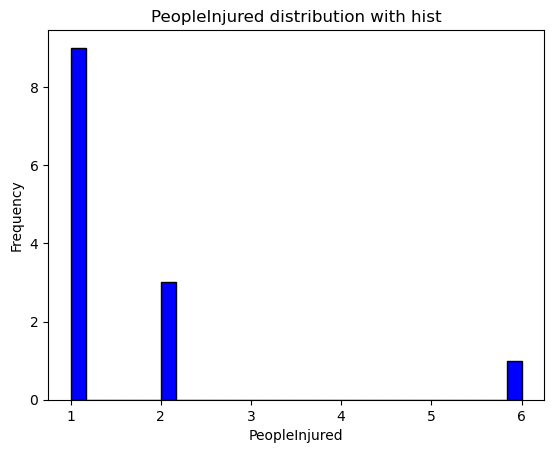

Number of people injured:  13


In [184]:
# Visualizing the distribution of numerical data in  column "Altitude"
num_var  = ["PeopleInjured"]

for i in num_var:
    filtered_data = data[data[i] != 0]
    plt.hist(filtered_data[i], bins=30, color='blue', edgecolor='black')
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(i))
    plt.show()

print("Number of people injured: ", filtered_data[i].count())

Exploring the incidents where people sustained injuries.

In [186]:
# Find the row(s) where People were Injured.
incidents_with_injuries = data[data['PeopleInjured'] > 0].shape[0]
total_people_injured = data[data['PeopleInjured'] != 0]['PeopleInjured'].sum()
data['Engines'] = pd.to_numeric(data['Engines'], errors='coerce').fillna(0).astype(int)

print("Total Incidents: ", data.shape[0])

for i in num_var:
    top_values = data.nlargest(incidents_with_injuries, i)
    print(f"There were {incidents_with_injuries} incidents in which people sustained injuries,")
    print(f"resulting in a total of {total_people_injured} individuals injured.\n")
top_values[['PeopleInjured', 'MakeModel', 'Engines', 'FlightPhase', 'WildlifeSize', 'WildlifeSpecies', 'ConditionsSky', 'Cost']]

Total Incidents:  25429
There were 13 incidents in which people sustained injuries,
resulting in a total of 21 individuals injured.



PeopleInjured        MakeModel  Engines   FlightPhase WildlifeSize  \
4422               6       LEARJET-24        2         Climb        Small   
232                2       LEARJET-60        2  Landing Roll        Large   
7180               2            C-172        1       Descent        Large   
24879              2        MAULE M-7        1         Climb       Medium   
780                1      DHC8 DASH 8        2      Approach       Medium   
2636               1  CIRRUS SR 20/22        1         Climb       Medium   
2779               1            C-402        2         Climb        Large   
5822               1            BE-95        2      Approach        Large   
7047               1            C-172        1      Approach        Large   
8453               1        PA-60 601        2         Climb        Large   
12250              1     C-210 CENTUR        1      Approach        Large   
16114              1            C-172        1      Approach        Large   
17066              1         ERCO 415        1         Climb       Medium   

             WildlifeSpecies ConditionsSky        Cost  
4422    Unknown bird - small      No Cloud     926,070  
232        White-tailed deer      No Cloud  12,397,751  
7180          Turkey vulture    Some Cloud       1,382  
24879                  Ducks      No Cloud      14,000  
780             Lesser scaup      No Cloud     123,476  
2636                 Anhinga      Overcast           0  
2779           Black vulture    Some Cloud           0  
5822           Black vulture      No Cloud      26,553  
7047          Turkey vulture      No Cloud         570  
8453           Black vulture      No Cloud       9,878  
12250          Black vulture      No Cloud           0  
16114          Black vulture      No Cloud           0  
17066  Unknown bird - medium      No Cloud      27,057

Visualizing correlation matrix heatmap.

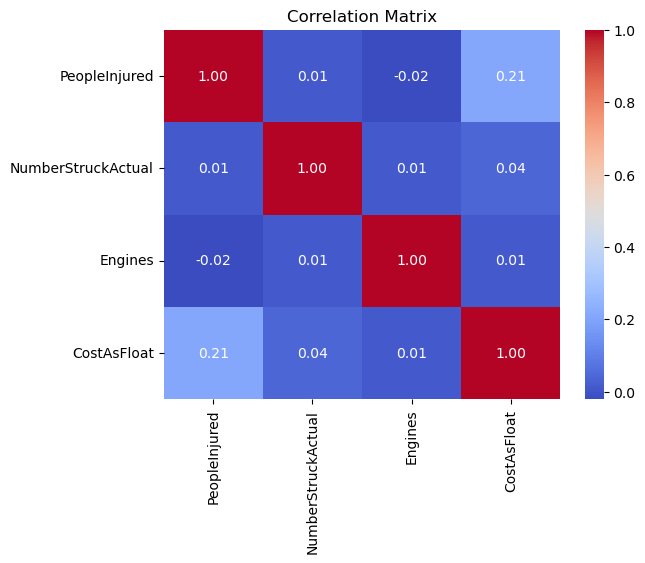

In [188]:
# Add 'Damage' and 'IsAircraftLarge?' to the list
list1 = ["PeopleInjured", "NumberStruckActual", "Engines", "CostAsFloat", ]

# Plot the heatmap of correlations
sns.heatmap(data[list1].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


##### Observations

1. Approximately 0.05% of incidents resulted in injuries to people.
2. There is a a weak correlation between "PeopleInjured" and these other factors: "NumberStruckActual", "Engines", "CostAsFloat".
3. Interestingly, the incident that resulted in the highest number of injuries involved small birds.

#### **Correlation**
The data shows little correlation between the fact that people got injured and other factors.

## **<a id='7'>7. Limitations and Challenges</a>** 
<div style="text-align: right"><a href="#top">Go to Top</a><div>

Although the dataset is highly usable and provides valuable insights, there are some gaps that limit a deeper understanding of the trends. For example, we observed an increase in incident occurrences over time, but it's unclear whether this is due to the growing number of planes in operation, urban expansion pushing into bird habitats, or potential changes in aircraft engine design.

While the data offers a strong foundation for analysis, it raises several questions that can only be answered with additional external data. Factors such as the number of aircraft, environmental changes, and even advancements in aviation technology could all influence the trends seen in this dataset. To fully comprehend the underlying causes and patterns, more comprehensive data will be needed to explore these variables in greater detail.


## **<a id='8'>8. Applications and Relevance</a>** 
<div style="text-align: right"><a href="#top">Go to Top</a><div>

### **Research Questions**

The research questions for this project focus on the data, aiming to identify correlations and trends through feature analysis.

#### 1. Damage Analysis: How do bird strikes affect flight operations and result in damage to aircraft?
Despite the frequency of bird strike incidents, the damage ratio does not appear to be a major concern overall. While the number of incidents is high, only a small fraction of these result in significant damage. Most incidents are minor and do not cause any lasting harm to the aircraft. There have been a few isolated costly incidents, but interestingly, even these were not caused by bird strikes. This suggests that while bird strikes are common, the severity and consequences in terms of damage are relatively low for the majority of cases. The data indicates that bird strikes do not often lead to serious disruptions in flight operations.

#### 2. Flight Phase: During which phases of flight are bird strikes most likely to happen?
Bird strikes are most likely to occur during the Approach phase of flight, where aircraft are generally flying at lower altitudes and are closer to airports, increasing the chances of encountering birds. Interestingly, the data shows that incidents are equally distributed across other flight phases, such as Climb, Landing Roll, and Take-off Run. This suggests that bird strikes are not restricted to a single phase but can occur at various points during the flight. Likely, height during Approach is the cause, due to the proximity to bird habitats around airports.

#### 3. Pilot Awareness: Is there a correlation between pilot awareness of bird strike risks and the severity of incidents?
It does not appear that pilot awareness has a significant proactive effect on the severity of bird strike incidents. The data shows little difference in the severity of incidents between cases where pilots were aware of the bird strike risk and those where they were not. This suggests that, while pilot awareness might be important for preventing some types of incidents, it may not be a decisive factor in minimizing the severity of bird strikes. In fact, damage-causing incidents do not show a marked difference in the Pilot Warned status, implying that other factors, such as the timing or circumstances of the incident, play a more significant role in determining its severity.

#### 4. Model Propensity: Which model has a higher propensity to be implicated in bird strikes?
Aircraft models with two engines have shown a higher tendency to be involved in bird strikes. Specifically, the B-737-700, a popular two-engine model, had the highest number of incidents. This could be due to the large number of these aircraft in operation, as more frequent flights naturally increase the likelihood of encountering bird strikes. However, the higher incidence of bird strikes among two-engine models may also reflect the operational characteristics of these aircraft, such as their flight patterns or altitudes. Despite being a commonly used model, the frequency of bird strikes for these aircraft does not necessarily indicate a design flaw, but rather a statistical outcome of their widespread use.

#### 5. Airport Incidents: Which U.S. airports experience the highest frequency of bird strikes?
The states with the highest frequency of bird strikes are:

    California: 2,499 incidents
    Texas: 2,445 incidents
    Florida: 2,045 incidents

These states have a significantly higher number of bird strike incidents compared to others. The high frequency in these states can likely be attributed to a combination of factors, including their large air traffic, and larger populations of birds in these regions. Additionally, urban and industrial expansion in these areas may contribute to more frequent encounters between aircraft and birds, especially around airports that are often located in areas close to wildlife habitats.

#### 6.  Injury Analysis: What key factors contribute to incidents where people sustain injuries? 
While the fact that people sustaining injuries during bird strike incidents warrants attention, the data does not reveal any clear correlation or pattern that suggests a foreseeable solution to mitigate such occurrences. Notably, the incident resulting in the highest number of injuries involved small birds, which challenges the assumption that larger birds pose a greater risk. This suggests that preparing specifically for incidents involving particular bird sizes may not yield significantly better outcomes. Instead, a broader approach to prevention and safety measures might be more effective in addressing the varied nature of these incidents.

### **Potential Use Cases**

### Three key potential use cases for the findings:

#### 1. Airport Wildlife Management

Airports can use the data to enhance wildlife hazard management programs. Understanding that bird strikes are most frequent during the Approach phase allows airports to focus on improving bird deterrent systems and monitoring in these critical areas. Airports could implement more advanced technologies such as radar systems, sonic deterrents, or vegetation management around vulnerable flight paths to reduce the likelihood of bird encounters.

#### 2. Pilot Training Programs

The data showing that pilot awareness does not significantly reduce the severity of incidents suggests a need for better reactive training. Flight schools and airlines could develop bird strike management courses that focus on how to handle incidents when they occur, especially during high-risk phases like approach. The training could also address emergency response protocols and strategies to reduce damage after a bird strike.

#### 3. Aircraft Design and Engineering

Given that two-engine aircraft (e.g., B-737-700) are involved in the most bird strikes, aircraft manufacturers could focus on designing more bird strike-resistant features. For instance, stronger windscreens, more durable engines, and other structural improvements could help reduce the damage from bird strikes. Additionally, examining the engineering needs for popular two-engine models could lead to the development of new systems that better withstand bird collisions.

These use cases focus on improving safety, enhancing operational efficiency, and reducing risks for the aviation industry based on the insights derived from the data.